In [1]:
#conda install openeo rioxarray geopandas leafmap h5netcdf netcdf4

In [2]:
from pathlib import Path
import json
import openeo
from shapely.geometry import shape
import geopandas as gpd
import matplotlib.pyplot as plt
import os 
from utils import extent_from_shp
import leafmap.foliumap as leafmap
import xarray as xr
from openeo.udf import execute_local_udf

/home/vpremier/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [3]:
# set the working directory
wd = os.getcwd()
base_path = wd + os.sep + "results"

if not os.path.exists(base_path):
    os.mkdir(base_path)
base_path   

'/home/vpremier/Documents/openEO/results'

## Show the study area and get the bounding box
- Read a shapefile with the AOI
- Get the basin outline
- Show on the map


In [4]:
shp_path = r'/mnt/CEPH_PROJECTS/PROSNOW/research_activity/Senales/auxiliary/boundaries/SenalesCatchment/SenalesCatchment.shp'

catchment_outline = gpd.read_file(shp_path)

center = (float(catchment_outline.centroid.y), 
          float(catchment_outline.centroid.x))
m = leafmap.Map(center=center, zoom=1)
m.add_vector(shp_path, layer_name="catchment")
m

In [5]:
bbox = catchment_outline.bounds.iloc[0]
bbox

minx    10.728539
miny    46.647281
maxx    11.039333
maxy    46.796379
Name: 0, dtype: float64

In [ ]:
#bbox = [10.728539, 46.647281, 11.039333, 46.796379]

## Authentication
- to the Copernicus Data Space Ecosystem https://openeo.dataspace.copernicus.eu/
- Vito backend https://openeo-dev.vito.be

In [6]:
eoconn = openeo.connect("https://openeo-dev.vito.be")
eoconn.authenticate_oidc()

eoconn.describe_account()

Visit https://aai.egi.eu/device?user_code=JAWU-XGXA 📋 to authenticate.

[###################################--] ✅ Authorized successfully

Authenticated using device code flow.


{'info': {'oidc_userinfo': {'eduperson_assurance': ['https://refeds.org/assurance/IAP/low',
    'https://aai.egi.eu/LoA#Substantial'],
   'eduperson_entitlement': ['urn:mace:egi.eu:group:vo.openeo.cloud:role=member#aai.egi.eu',
    'urn:mace:egi.eu:group:vo.openeo.cloud:role=vm_operator#aai.egi.eu'],
   'eduperson_scoped_affiliation': ['employee@eurac.edu', 'member@eurac.edu'],
   'email': 'valentina.premier@eurac.edu',
   'email_verified': True,
   'sub': 'b5345703744f82d43e36ecfbbe263186fb2556417bd8fe0054ae63476450f901@egi.eu',
   'voperson_verified_email': ['Valentina.Premier@eurac.edu']}},
 'name': 'Valentina.Premier@eurac.edu',
 'user_id': 'b5345703744f82d43e36ecfbbe263186fb2556417bd8fe0054ae63476450f901@egi.eu'}

In [28]:
eoconn.list_processes()

[{'categories': ['arrays'],
  'description': 'Applies a process to each individual value in the array. This is basically what other languages call either a `for each` loop or a `map` function.',
  'id': 'array_apply',
  'parameters': [{'description': 'An array.',
    'name': 'data',
    'schema': {'items': {'description': 'Any data type is allowed.'},
     'type': 'array'}},
   {'description': 'A process that accepts and returns a single value and is applied on each individual value in the array. The process may consist of multiple sub-processes and could, for example, consist of processes such as ``absolute()`` or ``linear_scale_range()``.',
    'name': 'process',
    'schema': {'parameters': [{'description': 'The value of the current element being processed.',
       'name': 'x',
       'schema': {'description': 'Any data type.'}},
      {'description': 'The zero-based index of the current element being processed.',
       'name': 'index',
       'schema': {'minimum': 0, 'type': 'integer'}},
      {'default': None,
       'description': 'The label of the current element being processed. Only populated for labeled arrays.',
       'name': 'label',
       'optional': True,
       'schema': [{'type': 'number'}, {'type': 'string'}, {'type': 'null'}]},
      {'default': None,
       'description': 'Additional data passed by the user.',
       'name': 'context',
       'optional': True,
       'schema': {'description': 'Any data type.'}}],
     'returns': {'description': 'The value to be set in the new array.',
      'schema': {'description': 'Any data type.'}},
     'subtype': 'process-graph',
     'type': 'object'}},
   {'default': None,
    'description': 'Additional data to be passed to the process.',
    'name': 'context',
    'optional': True,
    'schema': {'description': 'Any data type.'}}],
  'returns': {'description': 'An array with the newly computed values. The number of elements are the same as for the original array.',
   'schema': {'items': {'description': 'Any data type is allowed.'},
    'type': 'array'}},
  'summary': 'Apply a process to each array element'},
 {'categories': ['math > trigonometric'],
  'description': 'Computes the arc cosine of `x`. The arc cosine is the inverse function of the cosine so that *`arccos(cos(x)) = x`*.\n\nWorks on radians only.\nThe no-data value `null` is passed through and therefore gets propagated.',
  'examples': [{'arguments': {'x': 1}, 'returns': 0}],
  'id': 'arccos',
  'links': [{'href': 'http://mathworld.wolfram.com/InverseCosine.html',
    'rel': 'about',
    'title': 'Inverse cosine explained by Wolfram MathWorld'}],
  'parameters': [{'description': 'A number.',
    'name': 'x',
    'schema': {'type': ['number', 'null']}}],
  'returns': {'description': 'The computed angle in radians.',
   'schema': {'type': ['number', 'null']}},
  'summary': 'Inverse cosine'},
 {'categories': ['math > trigonometric'],
  'description': 'Computes the inverse hyperbolic cosine of `x`. It is the inverse function of the hyperbolic cosine so that *`arcosh(cosh(x)) = x`*.\n\nWorks on radians only.\nThe no-data value `null` is passed through and therefore gets propagated.',
  'examples': [{'arguments': {'x': 1}, 'returns': 0}],
  'id': 'arcosh',
  'links': [{'href': 'http://mathworld.wolfram.com/InverseHyperbolicCosine.html',
    'rel': 'about',
    'title': 'Inverse hyperbolic cosine explained by Wolfram MathWorld'}],
  'parameters': [{'description': 'A number.',
    'name': 'x',
    'schema': {'type': ['number', 'null']}}],
  'returns': {'description': 'The computed angle in radians.',
   'schema': {'type': ['number', 'null']}},
  'summary': 'Inverse hyperbolic cosine'},
 {'categories': ['math', 'math > exponential & logarithmic'],
  'description': 'Computes the exponentiation for the base `base` raised to the power of `p`.\n\nThe no-data value `null` is passed through and therefore gets propagated if any of the arguments is `null`.',
  'examples': [{'arguments': {'base': 0, 'p': 2}, 'returns':

Show the available collections

In [7]:
print(eoconn.list_collection_ids())

['MAPEO_WATER_TUR_V1', 'COP_DEM_EU_25M', 'ESA_WORLDCEREAL_ACTIVECROPLAND', 'ESA_WORLDCEREAL_IRRIGATION', 'ESA_WORLDCEREAL_TEMPORARYCROPS', 'ESA_WORLDCEREAL_WINTERCEREALS', 'ESA_WORLDCEREAL_MAIZE', 'ESA_WORLDCEREAL_SPRINGCEREALS', 'TEST_DMP', 'SENTINEL1_GRD_SIGMA0', 'S1_GRD_SIGMA0_ASCENDING', 'S1_GRD_SIGMA0_DESCENDING', 'SENTINEL3_SYNERGY_VG1', 'SENTINEL3_SYNERGY_VG10', 'TERRASCOPE_S2_FAPAR_V2', 'TERRASCOPE_S2_NDVI_V2', 'TERRASCOPE_S2_LAI_V2', 'TERRASCOPE_S2_FCOVER_V2', 'TERRASCOPE_S2_TOC_V2', 'TERRASCOPE_S1_SLC_COHERENCE_V1', 'SENTINEL1_GAMMA0_SENTINELHUB', 'SENTINEL1_GRD', 'SENTINEL2_L1C_SENTINELHUB', 'SENTINEL2_L2A_SENTINELHUB', 'SENTINEL2_L2A_MOSAIC_120', 'PROBAV_L3_S10_TOC_333M', 'PROBAV_L3_S5_TOC_100M', 'PROBAV_L3_S1_TOC_100M', 'PROBAV_L3_S1_TOC_333M', 'TERRASCOPE_S5P_L3_CO_TD_V1', 'TERRASCOPE_S5P_L3_CO_TM_V1', 'TERRASCOPE_S5P_L3_CO_TY_V1', 'LANDSAT8-9_L1', 'LANDSAT8-9_L2', 'LANDSAT4-5_TM_L1', 'LANDSAT4-5_TM_L2', 'LANDSAT7_ETM_L1', 'LANDSAT7_ETM_L2', 'MODIS', 'SENTINEL3_OLCI_L1B',

Load the Copernicus fractional snow cover collection

In [8]:
scf = eoconn.load_collection(
    "FRACTIONAL_SNOW_COVER",
    spatial_extent  = {'west':bbox[0],
                       'east':bbox[2],
                       'south':bbox[1],
                       'north':bbox[3],
                       'crs':4326},
    temporal_extent=['2023-08-02','2023-08-15'],
    bands=["FSCTOC"]
)
scf
# scf.download(base_path + os.sep + 'scf_0.nc')

Load the MODIS SCF data (?)

In [26]:
#modis = eoconn.load_stac(url = 'https://planetarycomputer.microsoft.com/api/stac/v1/collections/modis-10A1-061',
#                         spatial_extent = {"west":16.15,"east":16.2,"north":47.3,"south":47.25}, 
#                         temporal_extent=['2022-11-02','2022-11-03']                         temporal_extent=['2022-11-02','2022-11-03']`,
#                         bands=["NDSI_Snow_Cover"])
#modis.download(base_path +os.sep+ "modis.nc")

- Resample the datatset to the target crs and resolution.
- Apply filter_bbox to filter to a new extent (now set manually in order to have a grid that is exactly aligned with a 500 m specific grid). In the future -> resample_cube_spatial to resample it w.r.t. the MODIS collection (not available at the moment)

In [24]:
west=631910.
south=5167310.
east=655890.
north=5184290.
res = 20.

# check that the grid is aligned with a 500 m gri
print('Nr. of low-resolution pixels in the resampled grid (x): {}'.format((east + res/2. - (west - res/2. ))/500.))
print('Nr. of low-resolution pixels in the resampled grid (y): {}'.format((south - res/2. - (north + res/2. ))/-500.))

scf_rsmpl = scf.resample_spatial(resolution=res, 
                                 projection=32632,
                                 method = "cubic")

            
scf_bbox = scf_rsmpl.filter_bbox(west=west, 
                                 south=south, 
                                 east=east, 
                                 north=north, 
                                 crs=32632)
# scf_bbox.download(base_path + os.sep + 'scf_rsmp.nc')
scf_bbox

Nr. of low-resolution pixels in the resampled grid (x): 48.0
Nr. of low-resolution pixels in the resampled grid (y): 34.0


The Copernicus FSC needs to be converted to a binary map: snow (100) - snow free (0) and clouds/no data (205)

In [25]:
binarize = openeo.UDF.from_file('udf-binarize.py', 
                                context={"from_parameter": "context"})

scf_binary = scf_bbox.apply(process=binarize, 
                            context={"snowT": 20})

scf_binary_renamed = scf_binary.rename_labels(dimension="bands",
                                              target=["scf"])
# scf_binary.download(base_path + os.sep + 'scf_binary.nc')

# More elegant alternative: band math but problem with the unsigned bits
# scf_test = 100.0 * (scf >= 20) * (scf <= 100) + 205.0 * (scf == 205)
scf_binary

Test. A very simple udf that should print out some DataCube features... When using apply, it works!

In [34]:
test = openeo.UDF.from_file('udf-test.py')
mytest = scf_binary.apply(process=test)

test_inspect = mytest.save_result(format='netCDF')
job = test_inspect.create_job(title='inspect')
job.start_job()

#job.status()

#mytest.download(base_path + os.sep + 'scf_test.nc')

<BatchJob job_id='j-240212366f534694bf2b645ad331298f'>

In [36]:
test = Path('udf-test.py').read_text()

mytest = scf_binary.apply_neighborhood(
    lambda data: data.run_udf(udf=test, 
                              runtime='Python-Jep', 
                              context=dict()),
    size=[
        {'dimension': 'x', 'value': 600, 'unit': 'px'},
        {'dimension': 'y', 'value': 500, 'unit': 'px'}
    ], overlap=[])
mytest.download(base_path + os.sep + 'scf_test2.nc')

OpenEoApiError: [500] Internal: Server error: Exception during Spark execution: java.lang.IllegalStateException: SpatialKeyPartitioner was used to partition non-spatial keys. (ref: r-2402125ce6824a63be2e7ebd478618ea)

Example of apply_neighborhood (from https://open-eo.github.io/openeo-python-client/udf.html)
I want to do something similar.. downsampling the datacube and eventually update the cube metadata

In [29]:
udf_code = Path('udf_modify_spatial.py').read_text()

cube_updated = scf_binary.apply_neighborhood(
    lambda data: data.run_udf(udf=udf_code, runtime='Python-Jep', context=dict()),
    size=[
        {'dimension': 'x', 'value': 128, 'unit': 'px'},
        {'dimension': 'y', 'value': 128, 'unit': 'px'}
    ], overlap=[])

cube_updated.download(base_path + os.sep + 'scf_test.nc')

OpenEoApiError: [500] Internal: Server error: Exception during Spark execution: org.apache.spark.SparkException: Job aborted due to stage failure: 
Aborting TaskSet 2256.0 because task 1 (partition 1)
cannot run anywhere due to node and executor excludeOnFailure.
Most recent failure:
Lost task 1.1 in stage 2256.0 (TID 733196) (epod048.vgt.vito.be executor 18937): jep.JepException: <class 'TypeError'>: unsupported operand type(s) for /: 'NoneType' and 'float'
	at <string>.apply_metadata(<string>:20)
	at <string>.<module>(<string>:1)
	at jep.Jep.exec(Native Method)
	at jep.Jep.exec(Jep.java:341)
	at org.openeo.geotrellis.udf.Udf$.$anonfun$callApplyMetadata$1(Udf.scala:204)
	at org.openeo.geotrellis.udf.Udf$.$anonfun$callApplyMetadata$1$adapted(Udf.scala:197)
	at scala.collection.Iterator$$anon$10.next(Iterator.scala:461)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:366)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:364)
	at scala.collection.AbstractIterator.to(Iterator.scala:1431)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:358)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:358)
	at scala.collection.AbstractIterator.toBuffer(Iterator.scala:1431)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:345)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at scala.collection.AbstractIterator.toArray(Iterator.scala:1431)
	at org.apache.spark.rdd.RDD.$anonfun$collect$2(RDD.scala:1019)
	at org.apache.spark.SparkContext.$anonfun... (ref: r-240212b08c49432ba75386389492718b)

Aggregate the S-2 pixels to the resolution of the MODIS to get a SCF

In [45]:
#execute the udf locally
path=r'/home/vpremier/Documents/openEO/results/scf_binary.nc'
array = xr.open_dataset(path,decode_coords="all")

aggregation = openeo.UDF.from_file('udf-scf-local.py', 
                                   context={"from_parameter": "context"})
output = execute_local_udf(aggregation, path, fmt='netcdf')

Coordinates:
  * t        (t) datetime64[ns] 2023-08-06 2023-08-11 2023-08-14
  * bands    (bands) object 'FSCTOC'


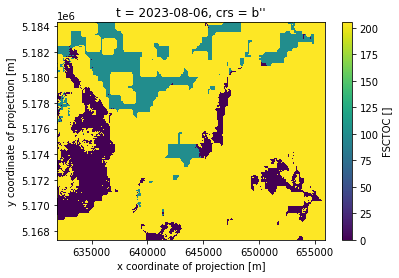

In [46]:
array.isel(t=0)['FSCTOC'].plot()

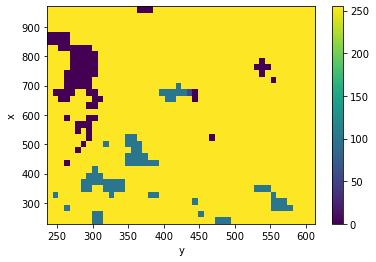

In [53]:
output.get_datacube_list()[0].get_array().plot()

In [55]:
# works but the result is wrong (probably due to the chunk size!)
aggregation = openeo.UDF.from_file('udf-scf.py', 
                                context={"from_parameter": "context"})

scf_aggregated = scf_binary.apply(process=aggregation, 
                                   context={"pixel_ratio": 25})
scf_aggregated.download(base_path + os.sep + 'scf_aggregated.nc')

In [ ]:
scf_aggregated_renamed = scf_aggregated.rename_labels(dimension="bands",
                                                      target=["aggregated"])
merged_cube = scf_binary_renamed.merge_cubes(scf_aggregated)

In [56]:
aggregation = Path('udf-scf.py').read_text()

scf_aggregated = scf_binary.apply_neighborhood(
    lambda data: data.run_udf(udf=aggregation, runtime='Python-Jep'),
    size=[
        {'dimension': 'x', 'value': 600, 'unit': 'px'},
        {'dimension': 'y', 'value': 500, 'unit': 'px'}
    ], overlap=[])
scf_aggregated.download(base_path + os.sep + 'scf_aggregated2.nc')

OpenEoApiError: [500] Internal: Server error: Exception during Spark execution: org.apache.spark.SparkException: Job aborted due to stage failure: 
Aborting TaskSet 2464.0 because task 1 (partition 1)
cannot run anywhere due to node and executor excludeOnFailure.
Most recent failure:
Lost task 1.1 in stage 2464.0 (TID 750981) (epod047.vgt.vito.be executor 19191): jep.JepException: <class 'KeyError'>: ('pixel_ratio',)
	at <string>.apply_metadata(<string>:21)
	at <string>.<module>(<string>:1)
	at jep.Jep.exec(Native Method)
	at jep.Jep.exec(Jep.java:341)
	at org.openeo.geotrellis.udf.Udf$.$anonfun$callApplyMetadata$1(Udf.scala:204)
	at org.openeo.geotrellis.udf.Udf$.$anonfun$callApplyMetadata$1$adapted(Udf.scala:197)
	at scala.collection.Iterator$$anon$10.next(Iterator.scala:461)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:366)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:364)
	at scala.collection.AbstractIterator.to(Iterator.scala:1431)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:358)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:358)
	at scala.collection.AbstractIterator.toBuffer(Iterator.scala:1431)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:345)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at scala.collection.AbstractIterator.toArray(Iterator.scala:1431)
	at org.apache.spark.rdd.RDD.$anonfun$collect$2(RDD.scala:1019)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2303)
	at org... (ref: r-24021285ece14f94a889b533cfbe7339)

In [206]:
results = job.get_results()
results

<JobResults for job 'j-2311215d3c68441db3af7aa8b68b5697'>